# 一、非线性SVM与核函数

## （一）SVC在非线性数据上的推广

为了能够找出非线性数据的线性决策边界，我们需要将数据从原始的空间*x*投射到新空间还*Φ*(*x*)中。*Φ*是一个映射函数，它代表了某种非线性的变换，如同上一章使用r来升维一样，这种非线性变换看起来是一种非常有效的方式。使用这种变换，线性SVM的原理可以被很容易推广到非线性情况下，其推导过程和逻辑都与线性SVM一模一样，只不过在定义决策边界之前，我们必须先对数据进行升维，即将原始的*x*转换成*Φ*(*x*)。

这种变换非常巧妙，但也带有一些实现问题。**首先**，我们可能不清楚应该什么样的数据应该使用什么类型的映射函数来确保可以在变换空间中找出线性决策边界。极端情况下，数据可能会被映射到无限维度的空间中，这种高维空间可能不是那么友好，维度越多，推导和计算的难度都会随之暴增。**其次**，即使已知适当的映射函数，我们想要计算决策函数中的点积，计算量可能会无比巨大，要找出超平面所付出的代价是非常昂贵的。

解决这些问题的数学方式叫做“核技巧”（Kernel Trick），是一种能够使用数据原始空间中的向量来表示升维空间中点积结果的数学方式。具体表现为K(u,v)=Φ(u)·Φ(v)。而这个原始空间中的**点积函数**K(u,v)，就被叫做“核函数”(Kernel Function)。

核函数能够帮助我们解决三个问题：<br>
第一，有了核函数，就无需去担心Φ应该是什么样，因为非线性SVM中的核函数都是正定核函数(positive definite kernel functions)，他们都满足美世定律(Mercer's theorem)，确保了高维空间中任意两个向量的点积一定可以被低维空间中的这两个向量的某种计算来表示（多数时候是点积的某种变换）。<br>
第二，使用核函数计算低维度中的向量关系比计算原本的点积简单得多。<br>
第三，因为计算是在原始空间中进行，所以避免了维度诅咒的问题。

## （二）重要参数：kernal

选用不同的核函数，就可以解决不同数据分布下的寻找超平面问题。在SVC中，这个功能由参数“kernel”和一系列与核函数相关的参数来进行控制。参数“kernel"在sklearn中可选以下几种选项：

输入|含义|解决问题|核函数的表达式|参数gamma|参数degree|参数coef0
-|-|-|-|-|-|-
'linear'|线性核|线性|$K(x,y)=x^{T}y=x·y$|No|No|No
'poly'|多项式核|偏线性|$K(x,y)=(γ(x·y)+r)^{d}$|Yes|Yes|Yes
'sigmoid'|双曲正切核|非线性|$K(x,y)=tanh(γ(x·y)+r)$|Yes|No|Yes
'rbf'|高斯径向基核|偏非线性|$K(x,y)=e^{-γ\|\|x-y\|\|^{2}}，γ＞0$|Yes|No|No

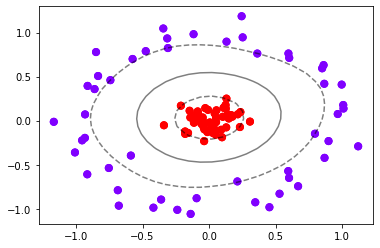

In [1]:
#以rbf为例观察决策边界
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_circles
X,y = make_circles(100, factor=0.1, noise=.1)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x) 
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P,colors="k",levels=[-1,0,1],alpha=0.5,linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

clf = SVC(kernel = "rbf").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

## （三）探索核函数在不同数据集上的表现

### 1.导入需要的库和模块

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap #色彩块
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.datasets import make_circles,make_moons,make_blobs,make_classification #环型、月亮型、簇、对半分

### 2.创建数据集，定义核函数的选择

In [3]:
n_samples = 100
datasets = [
    make_moons(n_samples=n_samples,noise=0.2,random_state=0),
    make_circles(n_samples=n_samples,noise=0.2,factor=0.5,random_state=1),
    make_blobs(n_samples=n_samples,centers=2,random_state=5),
    make_classification(n_samples=n_samples,n_features=2,n_informative=2,n_redundant=0,random_state=5) #特征个数2，带信息的特征为2，噪音特征为0
]

In [4]:
Kernel = ['linear','poly','rbf','sigmoid']

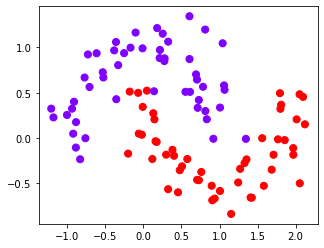

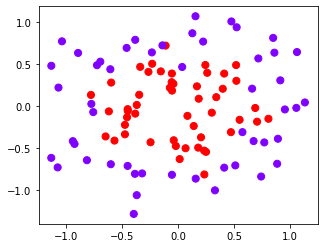

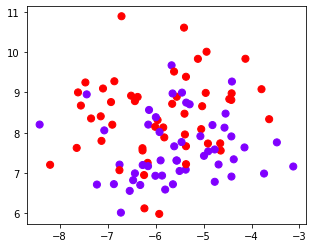

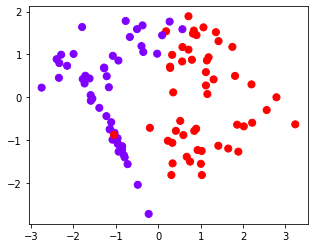

In [5]:
#用散点图描绘四个数据集的样子
for X,Y in datasets:
    plt.figure(figsize=(5,4))
    plt.scatter(X[:,0],X[:,1],c=Y,s=50,cmap='rainbow')

### 3.构建子图

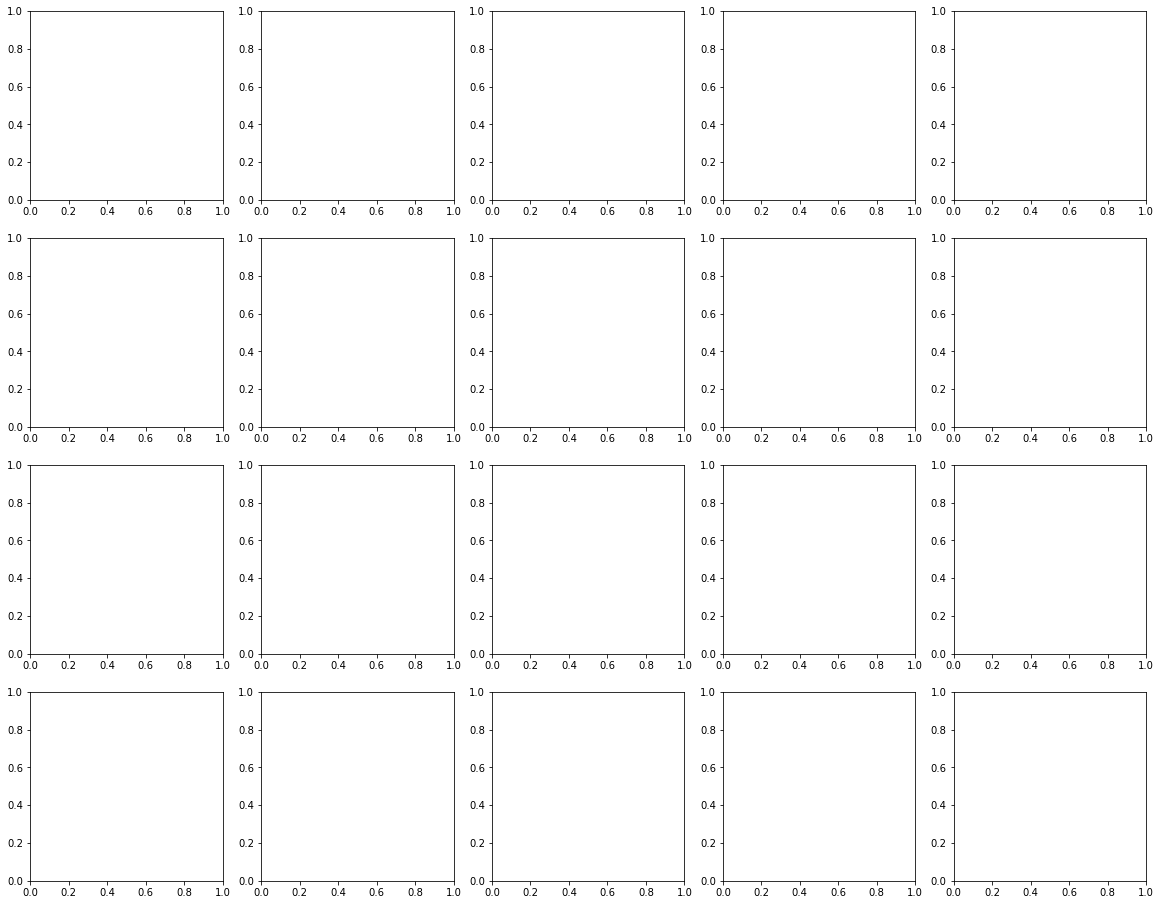

In [6]:
nrows = len(datasets)
ncols = len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(20,16))

### 4.开始子图循环

In [7]:
list(enumerate(datasets)) == [*enumerate(datasets)]

True

<ipython-input-8-38c2a9ce0720>:54: UserWarning: No contour levels were found within the data range.
  ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])


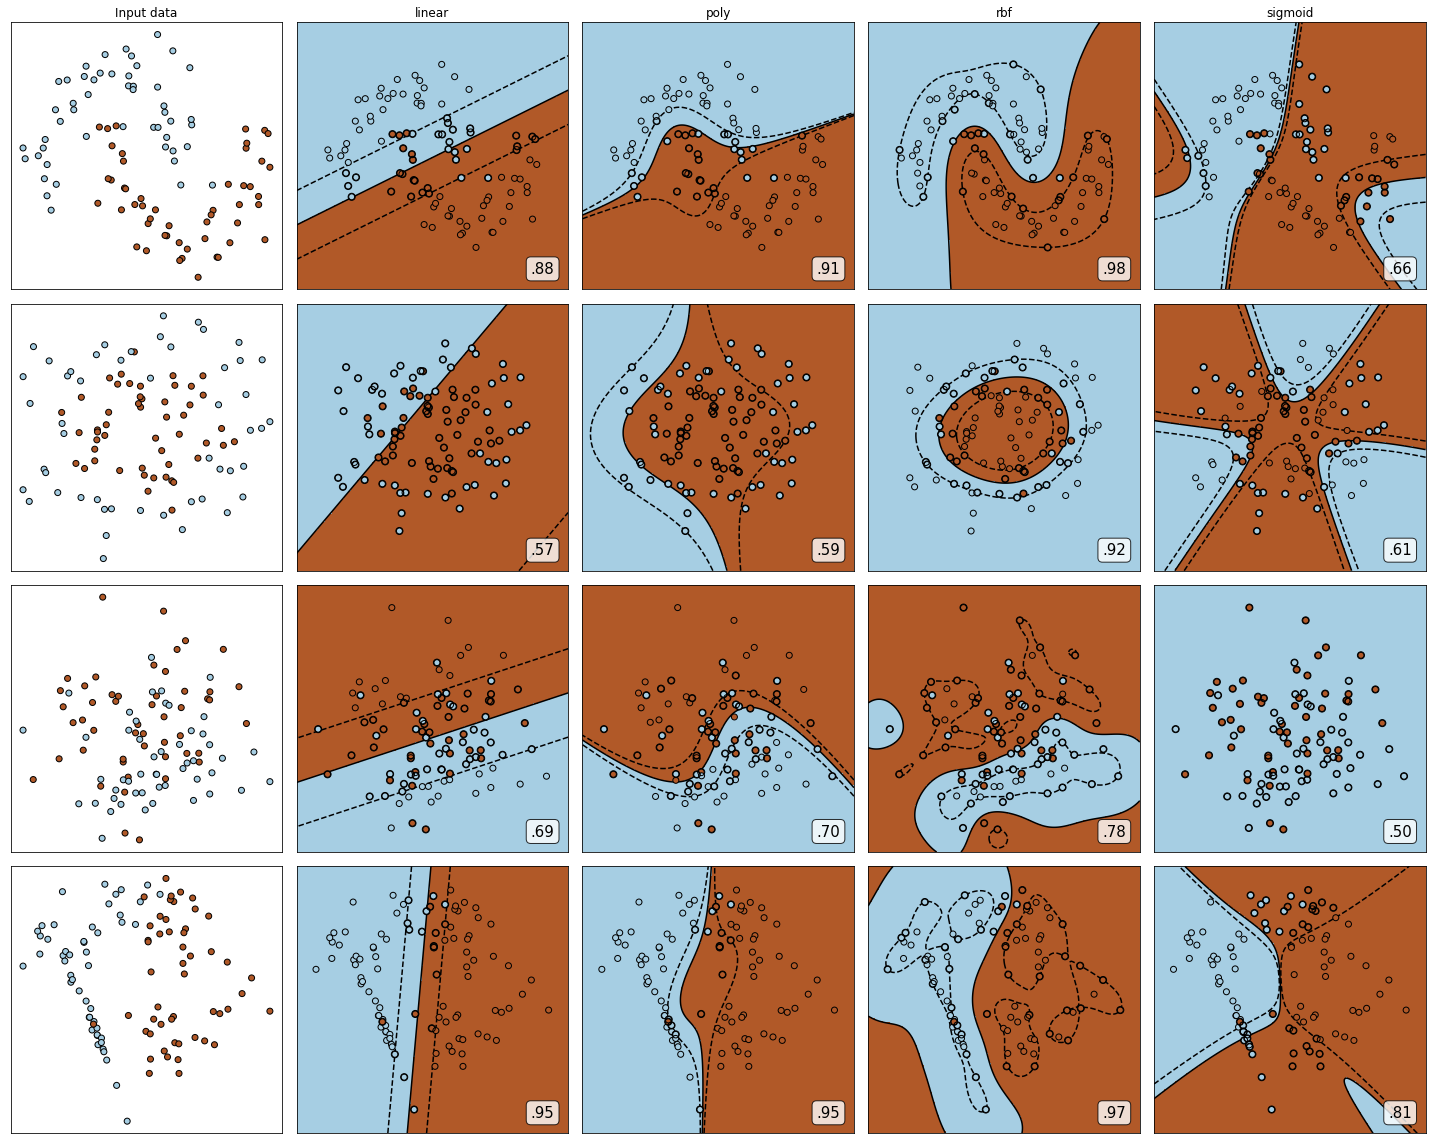

In [8]:
nrows = len(datasets)
ncols = len(Kernel) + 1
fig, axes = plt.subplots(nrows, ncols, figsize=(20,16))

#第一层循环：在不同的数据集中循环
for ds_cnt, (X,Y) in enumerate(datasets):#[(索引,array([特征矩阵X],[标签Y]))]
    
    #在图像中的第一列，放置原数据的分布
    ax = axes[ds_cnt, 0] #循环第一列子图
    if ds_cnt == 0:
        ax.set_title('Input data')
    ax.scatter(X[:, 0],X[:, 1],c=Y,zorder=10,cmap=plt.cm.Paired,edgecolors='k') #zorder图像层级，值越大越显示在顶层；edgecolors每个散点图的边是k色
    ax.set_xticks(()) #x轴没有坐标
    ax.set_yticks(()) #y轴没有坐标
    
    #第二层循环：在不同的核函数中循环
    #从图像的第二列开始，一个个填充分类结果
    for est_idx, kernel in enumerate(Kernel):
        
        #定义子图位置
        ax = axes[ds_cnt, est_idx + 1] #按行填充，[ds_cnt索引所在行,索引est_idx + 1所在列]
        
        #建模
        clf = svm.SVC(kernel=kernel, gamma=2).fit(X, Y)
        score = clf.score(X, Y) #为训练拟合打分
        
        #绘制图像本身分布的散点图
        ax.scatter(X[:, 0],X[:, 1]
                  ,c=Y
                  ,zorder=10
                  ,cmap=plt.cm.Paired
                  ,edgecolors='k')
        #绘制支持向量，圈起来
        ax.scatter(clf.support_vectors_[:, 0]
                  ,clf.support_vectors_[:, 1]
                  ,s=50
                  ,facecolors='none' #透明色，不覆盖本来的散点图
                  ,zorder=10
                  ,edgecolors='k')
        
        #绘制决策边界，比数据本身多0.5的区间
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        
        #np.mgrid，合并了之前使用的np.linspace和np.meshgrid的用法
        #一次性使用最大值和最小值来生成网格，表示为[起始值：结束值：步长]
        #如果步长是复数，则其整数部分就是起始值和结束值之间创建的点的数量，并且结束值被包含在内
        XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
        #np.c_，类似于np.vstack的功能
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
        #填充等高线不同区域的颜色
        ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
        #绘制等高线
        ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-1, 0, 1])
        
        #设定坐标轴为不显示
        ax.set_xticks(())
        ax.set_yticks(())
        
        #将标题放在第一行的顶上
        if ds_cnt == 0:
            ax.set_title(kernel)
            
        #为每张图添加分类的分数   
        ax.text(0.95, 0.06, ('%.2f' % score).lstrip('0')
               ,size=15
               ,bbox=dict(boxstyle='round', alpha=0.8, facecolor='white')#为分数添加一个白色的格子作为底色，圆形格子，透明度0.8，格子颜色白色
               ,transform=ax.transAxes #确定文字所对应的坐标轴，就是ax子图的坐标轴本身
               ,horizontalalignment='right' #位于坐标轴的什么方向
               )
plt.tight_layout() #图像间隔紧缩
plt.show()

#第3行最后一张图报警告，因为sigmoid无法处理簇数据，可以试试决策树，可达到rbf

可以观察到，**线性核函数**和**多项式核函数**在非线性数据上表现会浮动，如果数据相对线性可分，则表现不错，如果是像环形数据那样彻底不可分的，则表现糟糕。在**线性**数据集上，线性核函数和多项式核函数即便有扰动项也可以表现不错，可见多项式核函数是虽然也可以处理非线性情况，但更偏向于线性的功能。<br>
**Sigmoid核函数**就比较尴尬了，它在非线性数据上强于两个线性核函数，但效果明显不如rbf，它在线性数据上完全比不上线性的核函数们，对扰动项的抵抗也比较弱，所以它功能比较弱小，**很少被用到**。<br>
**rbf高斯径向基核函数**基本在任何数据集上都表现不错，属于比较**万能**的核函数。<br>
我个人的经验是，无论如何先试试看**高斯径向基核函数**，它适用于核转换到很高的空间的情况，在各种情况下往往效果都很不错，如果rbf效果不好，那再试试看其他的核函数。另外，**多项式核函数**多被用于**图像处理**。<br>

## （四）探索核函数的优势和缺陷（乳腺癌数据）

除了Sigmoid核函数，其他核函数效果都还不错。但其实rbf和poly都有自己的弊端，这里使用乳腺癌数据集作为例子来展示一下。

In [9]:
from sklearn.datasets import load_breast_cancer #乳腺癌数据集，500+样本，30个特征
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from time import time
import datetime

In [10]:
data = load_breast_cancer() #实例化，data是字典
X = data.data
y = data.target

In [11]:
X.shape

(569, 30)

In [12]:
np.unique(y)

array([0, 1])

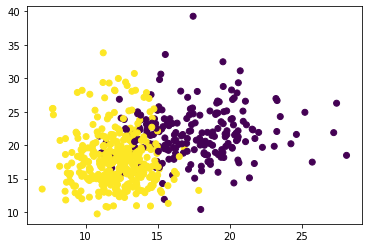

In [13]:
plt.scatter(X[:,0],X[:,1],c=y) #选择前两个特征画散点图
plt.show()

In [14]:
from sklearn.decomposition import PCA
X_dr = PCA(2).fit_transform(X)
X_dr.shape

(569, 2)

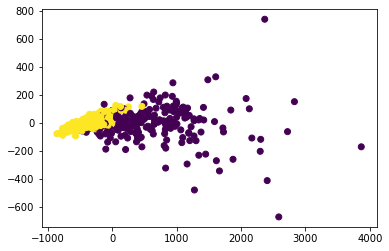

In [15]:
plt.scatter(X_dr[:,0],X_dr[:,1],c=y) #选使用降维后的两个特征画散点图
plt.show()

In [16]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)

In [ ]:
Kernel = ['linear','poly','rbf','sigmoid']
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel #利用不同核函数建模
            ,gamma='auto'
            #,degree = 1 #多项核函数的次数，默认3
            ,cache_size=5000 #使用多大（MB）的内存进行计算，默认200MB
            ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is 0.929825
00:02:835190


In [17]:
datetime.datetime.fromtimestamp(time()).strftime('%Y-%m-%d,%H:%M:%S:%f')

'2022-05-02,23:08:07:393406'

模型一直停留在线性核函数之后，就没有再打印结果了。这证明，多项式核函数此时此刻要消耗大量的时间，运算非常的缓慢。在循环中去掉多项式核函数，再试试看能否跑出结果。

In [18]:
Kernel = ['linear','rbf','sigmoid']
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel #利用不同核函数建模
            ,gamma='auto'
            #,degree = 1 #多项核函数的次数，默认3
            ,cache_size=5000 #使用多大（MB）的内存进行计算，默认200MB
            ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is 0.929825
00:01:788342
The accuracy under kernel rbf is 0.596491
00:00:143620
The accuracy under kernel sigmoid is 0.596491
00:00:016957


有两个发现。首先，乳腺癌数据集是一个线性数据集，线性核函数跑出来的效果很好。rbf和sigmoid两个擅长非线性的数据从效果上来看完全不可用。其次，线性核函数的运行速度远远不如非线性的两个核函数。

如果数据是线性的，把degree参数调整为1，多项式核函数应该也可以得到不错的结果。

In [19]:
Kernel = ['linear','poly','rbf','sigmoid']
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel #利用不同核函数建模
            ,gamma='auto'
            ,degree = 1 #多项核函数的次数，默认3
            ,cache_size=5000 #使用多大（MB）的内存进行计算，默认200MB
            ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is 0.929825
00:01:940436
The accuracy under kernel poly is 0.923977
00:00:394520
The accuracy under kernel rbf is 0.596491
00:00:150755
The accuracy under kernel sigmoid is 0.596491
00:00:016956


多项式核函数的运行速度立刻加快了，并且精度也提升到了接近线性核函数的水平。但是，在之前的实验中，rbf在线性数据上也可以表现得非常好，为什么这里跑出来的结果如此糟糕呢？其实，这里真正的问题是数据的**量纲**问题。回忆一下我们如何求解决策边界，如何判断点是否在决策边界的一边？是靠计算“距离”，虽然不能说SVM是完全的距离类模型，但是它严重受到数据量纲的影响。让我们来探索一下乳腺癌数据集的量纲。

In [20]:
import pandas as pd
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T #量纲不统一，数据偏态

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,14.127292,3.524049,6.981000,8.458360,9.529200,10.260000,11.700000,13.370000,15.780000,19.530000,24.371600,28.11000
1,569.0,19.289649,4.301036,9.710000,10.930400,13.088000,14.078000,16.170000,18.840000,21.800000,24.992000,30.652000,39.28000
2,569.0,91.969033,24.298981,43.790000,53.827600,60.496000,65.830000,75.170000,86.240000,104.100000,129.100000,165.724000,188.50000
3,569.0,654.889104,351.914129,143.500000,215.664000,275.780000,321.600000,420.300000,551.100000,782.700000,1177.400000,1786.600000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.068654,0.075042,0.079654,0.086370,0.095870,0.105300,0.114820,0.132888,0.16340
5,569.0,0.104341,0.052813,0.019380,0.033351,0.040660,0.049700,0.064920,0.092630,0.130400,0.175460,0.277192,0.34540
6,569.0,0.088799,0.079720,0.000000,0.000000,0.004983,0.013686,0.029560,0.061540,0.130700,0.203040,0.351688,0.42680
7,569.0,0.048919,0.038803,0.000000,0.000000,0.005621,0.011158,0.020310,0.033500,0.074000,0.100420,0.164208,0.20120
8,569.0,0.181162,0.027414,0.106000,0.129508,0.141500,0.149580,0.161900,0.179200,0.195700,0.214940,0.259564,0.30400
9,569.0,0.062798,0.007060,0.049960,0.051504,0.053926,0.055338,0.057700,0.061540,0.066120,0.072266,0.085438,0.09744


In [21]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
data = pd.DataFrame(X)
data.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
0,569.0,-3.162867e-15,1.00088,-2.029648,-1.610057,-1.305923,-1.098366,-0.689385,-0.215082,0.469393,1.534446,2.909529,3.971288
1,569.0,-6.530609e-15,1.00088,-2.229249,-1.945253,-1.443165,-1.212786,-0.725963,-0.104636,0.584176,1.326975,2.644095,4.651889
2,569.0,-7.078891e-16,1.00088,-1.984504,-1.571053,-1.296381,-1.076672,-0.691956,-0.235980,0.499677,1.529432,3.037982,3.976130
3,569.0,-8.799835e-16,1.00088,-1.454443,-1.249201,-1.078225,-0.947908,-0.667195,-0.295187,0.363507,1.486075,3.218702,5.250529
4,569.0,6.132177e-15,1.00088,-3.112085,-1.971730,-1.517125,-1.188910,-0.710963,-0.034891,0.636199,1.313694,2.599511,4.770911
5,569.0,-1.120369e-15,1.00088,-1.610136,-1.345369,-1.206849,-1.035527,-0.747086,-0.221940,0.493857,1.347811,3.275782,4.568425
6,569.0,-4.421380e-16,1.00088,-1.114873,-1.114873,-1.052316,-0.943046,-0.743748,-0.342240,0.526062,1.434288,3.300560,4.243589
7,569.0,9.732500e-16,1.00088,-1.261820,-1.261820,-1.116837,-0.974010,-0.737944,-0.397721,0.646935,1.328412,2.973759,3.927930
8,569.0,-1.971670e-15,1.00088,-2.744117,-1.885853,-1.448032,-1.153036,-0.703240,-0.071627,0.530779,1.233221,2.862418,4.484751
9,569.0,-1.453631e-15,1.00088,-1.819865,-1.600987,-1.257643,-1.057477,-0.722639,-0.178279,0.470983,1.342243,3.209454,4.910919


In [22]:
#标准化后
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3,random_state=420)
Kernel = ['linear','poly','rbf','sigmoid']
for kernel in Kernel:
    time0 = time()
    clf= SVC(kernel = kernel #利用不同核函数建模
            ,gamma='auto'
            ,degree = 1 #多项核函数的次数，默认3
            ,cache_size=5000 #使用多大（MB）的内存进行计算，默认200MB
            ).fit(Xtrain,Ytrain)
    print('The accuracy under kernel %s is %f' % (kernel,clf.score(Xtest,Ytest)))
    print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

The accuracy under kernel linear is 0.976608
00:00:062354
The accuracy under kernel poly is 0.964912
00:00:027567
The accuracy under kernel rbf is 0.970760
00:00:047159
The accuracy under kernel sigmoid is 0.953216
00:00:021335


量纲统一之后，所有核函数的运算时间都减少了，线性核尤其明显，且多项式核函数然变成了计算最快的。其次，rbf表现出了非常优秀的结果。经过探索，可以得到以下结论：<br>
1.线性核，尤其是多项式核函数在高次项时计算非常缓慢；<br>
2.rbf和多项式核函数都不擅长处理量纲不统一的数据集。<br>
幸运的是，这两个缺点都可以由数据无量纲化来解决。因此，SVM执行之前，非常推荐先进行数据的**无量纲化**。

## （五）选取与核函数相关的参数：degree & gamma & coef0

参数|含义
:-|:-
degree（d）|整数，可不填，默认3<br>多项式核函数的次数（'poly'），如果核函数没有选择'poly'，这个参数会被忽略
gamma（γ）|浮点数，可不填，默认'auto'<br>核函数的系数，仅在参数Kernel的选项为'rbf','poly'和'sigmoid'的时候有效<br>输入'auto'，自动使用1/(n_features)作为gamma的取值<br>输入'scale'，则使用1/(n_features * X.std())作为gamma的取值<br>输入'auto_deprecated'，则表示没有传递明确的gamma值（不推荐使用）<br>
coef0（r）|浮点数，可不填，默认=0.0<br>核函数中的常数项，它只在参数kernel为'poly'和'sigmoid'的时候有效

In [23]:
#高斯径向基rbf-学习曲线gamma
gamma_range = np.logspace(-10, 1, 50) #返回在对数刻度上均匀间隔的数字
gamma_range

array([1.00000000e-10, 1.67683294e-10, 2.81176870e-10, 4.71486636e-10,
       7.90604321e-10, 1.32571137e-09, 2.22299648e-09, 3.72759372e-09,
       6.25055193e-09, 1.04811313e-08, 1.75751062e-08, 2.94705170e-08,
       4.94171336e-08, 8.28642773e-08, 1.38949549e-07, 2.32995181e-07,
       3.90693994e-07, 6.55128557e-07, 1.09854114e-06, 1.84206997e-06,
       3.08884360e-06, 5.17947468e-06, 8.68511374e-06, 1.45634848e-05,
       2.44205309e-05, 4.09491506e-05, 6.86648845e-05, 1.15139540e-04,
       1.93069773e-04, 3.23745754e-04, 5.42867544e-04, 9.10298178e-04,
       1.52641797e-03, 2.55954792e-03, 4.29193426e-03, 7.19685673e-03,
       1.20679264e-02, 2.02358965e-02, 3.39322177e-02, 5.68986603e-02,
       9.54095476e-02, 1.59985872e-01, 2.68269580e-01, 4.49843267e-01,
       7.54312006e-01, 1.26485522e+00, 2.12095089e+00, 3.55648031e+00,
       5.96362332e+00, 1.00000000e+01])

0.9766081871345029 0.012067926406393264


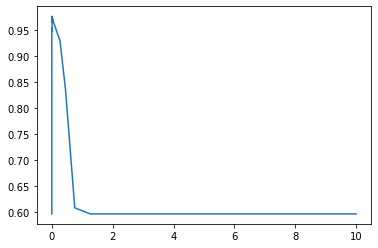

In [24]:
#高斯径向基rbf-学习曲线gamma
score = []

for i in gamma_range:
    clf = SVC(kernel='rbf',gamma = i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), gamma_range[score.index(max(score))])
plt.plot(gamma_range,score)
plt.show()

同线性核函数的精确度。

In [25]:
#多项式poly-网格搜索2个参数，不调degree（之前实验表明1最好）
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

time0 = time()

gamma_range = np.logspace(-10,1,20)
coef0_range = np.linspace(0,5,10)

param_grid = dict(gamma = gamma_range
                 ,coef0 = coef0_range)

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=420) #数据集分成5份，30%是测试集
grid = GridSearchCV(SVC(kernel = 'poly',degree=1,cache_size=5000)
                   ,param_grid=param_grid
                   ,cv=cv #交叉验证模式
                   )
grid.fit(X, y)
print('The best parameters are %s with a score of %0.5f' % (grid.best_params_, grid.best_score_))
print(datetime.datetime.fromtimestamp(time()-time0).strftime('%M:%S:%f'))

The best parameters are {'coef0': 0.0, 'gamma': 0.18329807108324375} with a score of 0.96959
00:36:868668


虽然比调参前略有提高，但依然没有超过线性核函数核rbf的结果。可见，如果最初选择核函数的时候就发现多项式的结果不如rbf和线性核函数，那就调整rbf或者直接使用线性。

# 二、硬间隔与软间隔：重要参数C

## （一）SVM在软间隔数据上的推广

当两组数据是完全线性可分的，就可以找出一个决策边界使得训练集上的**分类误差为0**，这两种数据就被称为是存在“**硬间隔**”的。当两组数据几乎是完全线性可分的，但决策边界在训练集上存在**较小的训练误差**，这两种数据就被称为是存在“**软间隔**”。对于软间隔数据来说，边际越大被分错的样本也就越多，因此需要找出一个**最大边际与被分错样本数量之间的平衡**。

## （二）重要参数：C

参数C用于权衡“训练样本的正确分类”与“决策函数的边际最大化”两个不可同时完成的目标，希望找出一个平衡点来让模型的效果最佳。

参数|含义
:-|:-
C|浮点数，默认1，必须大于等于0，可不填<br>松弛系数的惩罚项系数。如果C值设定比较大，那SVC可能会选择边际较小的，能够更好地分类所有训练点的决策边界，不过模型的训练时间也会更长。如果C的设定值较小，那SVC会尽量最大化边界，决策功能会更简单，但代价是训练的准确度。换句话说，C在SVM中的影响就像正则化参数对逻辑回归的影响。

0.9766081871345029 1.2340816326530613


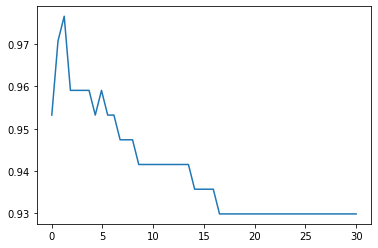

In [26]:
#使用学习曲线调整C的值-线性核函数linear
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel='linear',C=i,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))

print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.7424489795918365


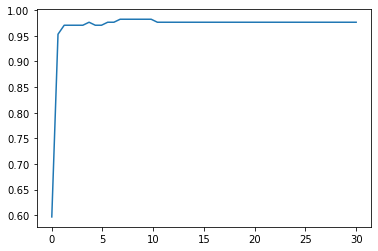

In [28]:
#使用学习曲线调整C的值-rbf
score = []
C_range = np.linspace(0.01,30,50)
for i in C_range:
    clf = SVC(kernel='rbf',C=i,gamma = 0.012067926406393264,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

0.9824561403508771 6.224489795918367


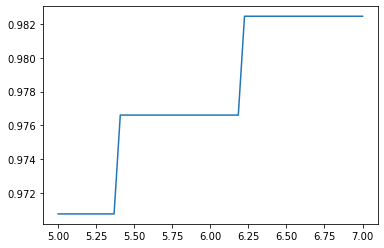

In [29]:
#使用学习曲线调整C的值-rbf-进一步细化
score = []
C_range = np.linspace(5,7,50)
for i in C_range:
    clf = SVC(kernel='rbf',C=i,gamma = 0.012067926406393264,cache_size=5000).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()